In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...,...
186845,186845,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016"
186846,186846,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016"
186847,186847,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001"
186848,186848,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016"


In [3]:
# Supprimer les lignes avec des valeurs manquantes
data = data.dropna()
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [4]:
# Convertir les colonnes pertinentes en types de données appropriés
data = data[data['Order Date'] != 'Order Date']
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M')
data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101"
1,1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016"
2,2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001"
3,3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301"
4,4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...,...
186845,186845,176554,Lightning Charging Cable,1,14.95,2019-03-24 11:14:00,"672 12th St, San Francisco, CA 94016"
186846,186846,176555,27in FHD Monitor,1,149.99,2019-03-22 20:27:00,"42 4th St, San Francisco, CA 94016"
186847,186847,176556,AAA Batteries (4-pack),3,2.99,2019-03-14 10:29:00,"871 7th St, Los Angeles, CA 90001"
186848,186848,176557,iPhone,1,700.00,2019-03-30 12:32:00,"83 Washington St, San Francisco, CA 94016"


In [5]:
# Sélectionner les caractéristiques pertinentes pour la segmentation (par exemple, 'Quantity Ordered' et 'Price Each')
caracteristiques = data[['Quantity Ordered', 'Price Each']]

In [26]:
from sklearn.cluster import KMeans
import warnings

# Désactiver les avertissements liés à threadpoolctl
warnings.filterwarnings("ignore", category=UserWarning, message=".*OpenMP*")

# Créer le modèle K-Means avec le nombre de classes souhaité (à déterminer)
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(caracteristiques)

# Appliquer le modèle aux caractéristiques sélectionnées
data['Cluster'] = kmeans.predict(caracteristiques)

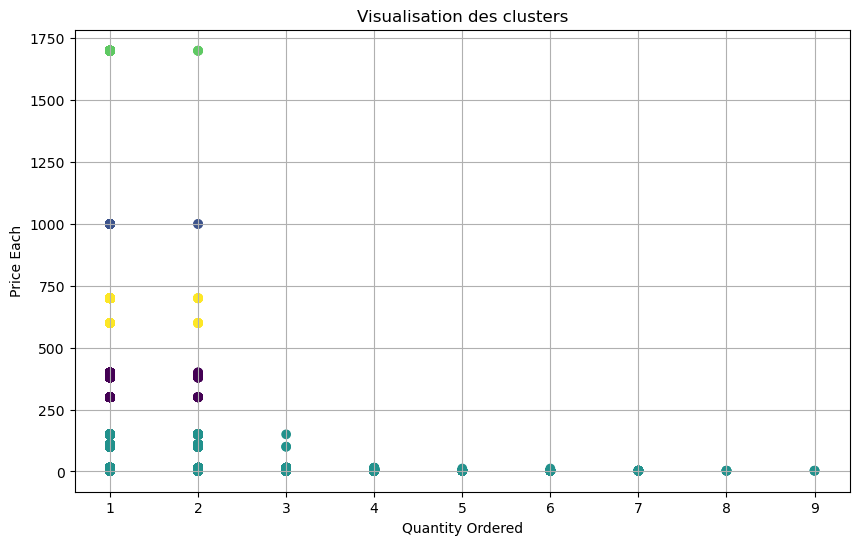

In [27]:
import matplotlib.pyplot as plt

# Visualisation des clusters en fonction des caractéristiques (par exemple, Quantity Ordered vs Price Each)
plt.figure(figsize=(10, 6))
plt.scatter(caracteristiques['Quantity Ordered'], caracteristiques['Price Each'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Quantity Ordered')
plt.ylabel('Price Each')
plt.title('Visualisation des clusters')
plt.grid(True)
plt.show()


In [28]:
# Ajouter les étiquettes des clusters aux données originales
data['Cluster'] = kmeans.labels_


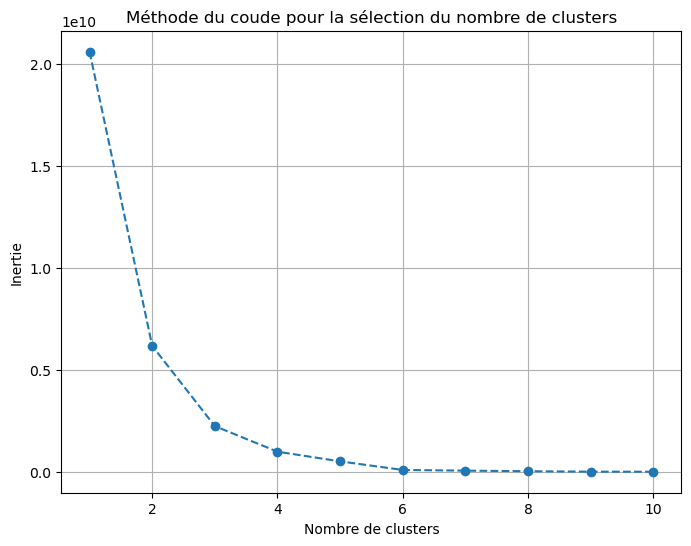

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Créez une liste pour stocker les valeurs de l'inertie (inertia) du modèle pour différents nombres de clusters
inertie = []

# Testez différents nombres de clusters de 1 à 10 (vous pouvez ajuster la plage si nécessaire)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(caracteristiques)
    inertie.append(kmeans.inertia_)

# Tracez le graphique de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertie, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour la sélection du nombre de clusters')
plt.grid(True)
plt.show()


In [30]:
# Calculer le chiffre d'affaires total de la société
chiffre_affaires_total = data['Price Each'].sum()

# Calculer la proportion de chiffre d'affaires pour chaque cluster
proportion_chiffre_affaires = data.groupby('Cluster')['Price Each'].sum() / chiffre_affaires_total

# Produits les plus achetés par les clients de chaque classe
produits_plus_achetes = data.groupby(['Cluster', 'Product'])['Quantity Ordered'].sum().reset_index()
produits_plus_achetes = produits_plus_achetes.sort_values(by=['Cluster', 'Quantity Ordered'], ascending=[True, False])
produits_plus_achetes = produits_plus_achetes.groupby('Cluster').first()

# Afficher la proportion de chiffre d'affaires et les produits les plus achetés pour chaque classe
for cluster, proportion, produit in zip(proportion_chiffre_affaires.index, proportion_chiffre_affaires, produits_plus_achetes['Product']):
    print(f"Cluster {cluster}:")
    print(f"Proportion sur le chiffre d'affaires total : {proportion:.2%}")
    print(f"Produit le plus acheté : {produit}\n")


Cluster 0:
Proportion sur le chiffre d'affaires total : 20.54%
Produit le plus acheté : 27in 4K Gaming Monitor

Cluster 1:
Proportion sur le chiffre d'affaires total : 12.04%
Produit le plus acheté : ThinkPad Laptop

Cluster 2:
Proportion sur le chiffre d'affaires total : 18.07%
Produit le plus acheté : AAA Batteries (4-pack)

Cluster 3:
Proportion sur le chiffre d'affaires total : 23.42%
Produit le plus acheté : Macbook Pro Laptop

Cluster 4:
Proportion sur le chiffre d'affaires total : 25.93%
Produit le plus acheté : iPhone

